In [252]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from collections import Counter
import ast
from collections import Counter
from sklearn.preprocessing import OneHotEncoder

In [253]:
path = "archive-2/Data/all_years"
datasets = []

In [254]:
for i in range(2000, 2026):
    file = f'{path}/merged_movies_data_{i}.csv'
    data = pd.read_csv(file)
    datasets.append(data)
dataset = pd.concat(datasets, ignore_index=True)


In [255]:

dataset.to_csv('combined_dataset.csv', index=False)

In [256]:
dataset = dataset.drop_duplicates()

In [257]:
dataset = dataset[~dataset['méta_score'].isna()].reset_index(drop=True)
dataset = dataset[~dataset['production_company'].isna()].reset_index(drop=True)
dataset = dataset[~dataset['stars'].isna()].reset_index(drop=True)
dataset = dataset[~dataset['MPA'].isna()].reset_index(drop=True)
print(len(dataset))
print(dataset['méta_score'].dtype)

9997
float64


In [258]:
dataset = dataset[~dataset['Rating'].isna()].reset_index(drop=True)

dataset= dataset.drop(columns=['gross_US_Canada','opening_weekend_Gross','budget', 'filming_locations'])
print(dataset.isna().sum())

Title                    0
Year                     0
Duration                 0
MPA                      0
Rating                   0
Votes                    0
méta_score               0
description              0
Movie Link               0
writers                  0
directors                0
stars                    0
grossWorldWWide        428
release_date             0
countries_origin         0
production_company       0
awards_content        1190
genres                   0
Languages                0
dtype: int64


In [259]:
def convert_duration(duration):
    if pd.isna(duration):
        return np.nan
    hours = re.search(r'(\d+)h', duration)
    minutes = re.search(r'(\d+)m', duration)
    h = int(hours.group(1)) if hours else 0
    m = int(minutes.group(1)) if minutes else 0
    return h * 60 + m
    

In [260]:
dataset['Duration'] = dataset['Duration'].apply(convert_duration)


In [261]:
def convert_votes(votes):
    if 'K' in votes:
        num = float(re.search(r'([\d.]+)', votes).group(1)) * 1000
    elif 'M' in votes:
        num = float(re.search(r'([\d.]+)', votes).group(1)) * 1000000
    else:
        num = float(votes)
    return num
dataset['Votes'] = dataset['Votes'].apply(convert_votes)

In [262]:
dataset['Duration'] = dataset['Duration'].fillna(dataset['Duration'].median())

In [263]:
def convert_gross(gross):
    if pd.isna(gross):
        return np.nan
    gross = int(gross.replace('$', '').replace(',',''))
    return gross

dataset['grossWorldWWide'] = dataset['grossWorldWWide'].apply(convert_gross)

In [264]:

dataset['grossWorldWWide'] = dataset['grossWorldWWide'].fillna(dataset['grossWorldWWide'].median())


In [265]:
all_actors = []
dataset['stars'] = dataset['stars'].apply(ast.literal_eval)
for actors in dataset['stars']:
    for actor in actors:
        all_actors.append(actor)

actor_counts = Counter(all_actors)
top_20 = actor_counts.most_common(100)

with pd.option_context('display.max_rows', None):
    print(top_actors)

                  Actor  Count
0     Samuel L. Jackson     62
1       Woody Harrelson     57
2          Willem Dafoe     55
3           Liam Neeson     52
4          J.K. Simmons     49
5         Nicole Kidman     49
6         Mark Wahlberg     46
7        Morgan Freeman     46
8        Cate Blanchett     46
9        Julianne Moore     46
10   Scarlett Johansson     46
11         Nicolas Cage     45
12           Bill Nighy     45
13       John Leguizamo     44
14       Robert De Niro     43
15          Owen Wilson     43
16           Matt Damon     42
17         Alec Baldwin     42
18        Colin Farrell     42
19          Naomi Watts     42
20        Ryan Reynolds     42
21       Rosario Dawson     41
22         James Franco     41
23          Ethan Hawke     41
24      Kristen Stewart     41
25        Paul Giamatti     40
26      Richard Jenkins     40
27        Tilda Swinton     40
28        Steve Buscemi     40
29        Jason Statham     40
30       Susan Sarandon     40
31      

In [266]:
encoder = OneHotEncoder(sparse=False)
encoded_mpa = encoder.fit_transform(dataset[['MPA']])
encoded_mpa_df = pd.DataFrame(encoded_mpa, columns=encoder.get_feature_names_out(['MPA']))
dataset = dataset.drop(columns=['MPA']).reset_index(drop=True)
dataset = pd.concat([dataset, encoded_mpa_df], axis=1)


In [268]:
 print("Encoded columns:", encoded_mpa_df.columns.tolist())
print(encoded_mpa_df.head())

# Проверим, что сумма по строкам равна 1 (one-hot encoding)
print(encoded_mpa_df.sum(axis=1).value_counts())

Encoded columns: ['MPA_13+', 'MPA_16+', 'MPA_18+', 'MPA_Approved', 'MPA_G', 'MPA_MA-17', 'MPA_NC-17', 'MPA_Not Rated', 'MPA_PG', 'MPA_PG-13', 'MPA_R', 'MPA_TV-14', 'MPA_TV-G', 'MPA_TV-MA', 'MPA_TV-PG', 'MPA_TV-Y7', 'MPA_Unrated']
   MPA_13+  MPA_16+  MPA_18+  MPA_Approved  MPA_G  MPA_MA-17  MPA_NC-17  \
0      0.0      0.0      0.0           0.0    0.0        0.0        0.0   
1      0.0      0.0      0.0           0.0    0.0        0.0        0.0   
2      0.0      0.0      0.0           0.0    0.0        0.0        0.0   
3      0.0      0.0      0.0           0.0    0.0        0.0        0.0   
4      0.0      0.0      0.0           0.0    0.0        0.0        0.0   

   MPA_Not Rated  MPA_PG  MPA_PG-13  MPA_R  MPA_TV-14  MPA_TV-G  MPA_TV-MA  \
0            0.0     1.0        0.0    0.0        0.0       0.0        0.0   
1            0.0     0.0        1.0    0.0        0.0       0.0        0.0   
2            0.0     0.0        1.0    0.0        0.0       0.0        0.0   
3      

In [271]:
dataset['writers'] = dataset['writers'].apply(ast.literal_eval)

In [273]:
#dataset['director'] = dataset['director'].apply(ast.literal_eval)
dataset['countries_origin'] = dataset['countries_origin'].apply(ast.literal_eval)
dataset['production_company'] = dataset['production_company'].apply(ast.literal_eval)
dataset['genres'] = dataset['genres'].apply(ast.literal_eval)
dataset['Languages'] = dataset['Languages'].apply(ast.literal_eval)

In [275]:
dataset['directors'] = dataset['directors'].apply(ast.literal_eval)

In [311]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import ast
from collections import Counter
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Path to folder containing CSV files
path = "archive-2/Data/all_years"
datasets = []

# Loop through years 2000 to 2025 and load CSV files into a list
for i in range(2000, 2026):
    file = f'{path}/merged_movies_data_{i}.csv'
    data = pd.read_csv(file)
    datasets.append(data)

# Combine all yearly datasets into a single DataFrame
dataset = pd.concat(datasets, ignore_index=True)

# Save combined dataset to a CSV file
dataset.to_csv('combined_dataset.csv', index=False)  

# Remove duplicate rows from the combined dataset
dataset = dataset.drop_duplicates()

# Remove rows where important columns have missing values
dataset = dataset[~dataset['méta_score'].isna()]
dataset = dataset[~dataset['production_company'].isna()]
dataset = dataset[~dataset['stars'].isna()]
dataset = dataset[~dataset['MPA'].isna()]
dataset = dataset[~dataset['Rating'].isna()]
dataset = dataset.reset_index(drop=True)

# Drop columns that are irrelevant or unnecessary for analysis
dataset = dataset.drop(columns=['gross_US_Canada','opening_weekend_Gross','budget', 'Movie Link', 'description', 'filming_locations', 'release_date'])

# Function to convert duration strings (e.g., '2h 30m') to total minutes
def convert_duration(duration):
    if pd.isna(duration):
        return np.nan
    hours = re.search(r'(\d+)h', duration)
    minutes = re.search(r'(\d+)m', duration)
    h = int(hours.group(1)) if hours else 0
    m = int(minutes.group(1)) if minutes else 0
    return h * 60 + m

# Function to convert votes with 'K' or 'M' suffixes to numeric values
def convert_votes(votes):
    if pd.isna(votes):
        return 0
    if 'K' in votes:
        num = float(re.search(r'([\d.]+)', votes).group(1)) * 1000
    elif 'M' in votes:
        num = float(re.search(r'([\d.]+)', votes).group(1)) * 1000000
    else:
        num = float(votes)
    return num

# Function to convert gross revenue strings like "$123,456,789" to integers
def convert_gross(gross):
    if pd.isna(gross):
        return np.nan
    gross = int(gross.replace('$', '').replace(',',''))
    return gross

# Fill missing values in 'awards_content' column with a default list ['No awards']
for i in range(len(dataset)):
    if pd.isna(dataset.at[i, 'awards_content']):
        dataset.at[i, 'awards_content'] = ['No awards']

# Apply the conversion functions to appropriate columns
dataset['grossWorldWWide'] = dataset['grossWorldWWide'].apply(convert_gross)
dataset['Votes'] = dataset['Votes'].apply(convert_votes)
dataset['Duration'] = dataset['Duration'].apply(convert_duration)

# Fill missing gross revenue values with the median of the column
dataset['grossWorldWWide'] = dataset['grossWorldWWide'].fillna(dataset['grossWorldWWide'].median())

# Function to extract Oscar nominations, wins, total nominations, and total wins from awards text
def award_proc(awards):
    if not isinstance(awards, str):
        return 0, 0, 0, 0
    oscar_nominated = 0
    oscar_won = 0
    nominations = 0
    wins = 0

    find_oscar_won = re.search(r'Won (\d+) Oscars?', awards)
    if find_oscar_won:
        oscar_won = int(find_oscar_won.group(1))
    find_oscar = re.search(r'Nominated for (\d+) Oscars?', awards)
    if find_oscar:
        oscar_nominated = int(find_oscar.group(1))
    find_nominations = re.search(r'(\d+) nominations? total', awards)
    if find_nominations:
        nominations = int(find_nominations.group(1))
    find_wins = re.search(r'(\d+) wins?', awards)
    if find_wins:
        wins = int(find_wins.group(1))
    return oscar_nominated, oscar_won, nominations, wins

# Parse awards information and store in separate lists
oscar_nominated = []
oscar_won = []
nominations = []
wins = []

for text in dataset["awards_content"]:
    on, ow, n, w = award_proc(text)
    oscar_nominated.append(on)
    oscar_won.append(ow)
    nominations.append(n)
    wins.append(w)

# Add awards info as new columns to dataset
dataset['Oscar_nominated'] = oscar_nominated
dataset['Oscar_won'] = oscar_won
dataset['Nominations'] = nominations
dataset['Wins'] = wins

# Convert string representations of lists in 'stars' column to actual Python lists
dataset['stars'] = dataset['stars'].apply(ast.literal_eval)

# Flatten all actors across all movies into a single list
all_actors = [actor for ls in dataset['stars'] for actor in ls]

# Count frequency of each actor and select the top 100 most frequent actors
actor_counts = Counter(all_actors)
top_100 = actor_counts.most_common(100)
top_actors_ls = [actor for actor, count in top_100]

# Create one-hot encoded columns for presence of top 100 actors in each movie
top_actors = pd.DataFrame({
    actor: dataset['stars'].map(lambda x: actor in x).astype(int)
    for actor in top_actors_ls
})

# Add the one-hot actor columns to the original dataset
dataset = pd.concat([dataset, top_actors], axis=1)

# Create a new feature that counts how many of the top 100 actors appear in each movie
dataset['top_actor_count'] = dataset[top_actors_ls].sum(axis=1)

# One-hot encode the 'MPA' rating column using sklearn's OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_mpa = encoder.fit_transform(dataset[['MPA']])
encoded_mpa_df = pd.DataFrame(encoded_mpa, columns=encoder.get_feature_names_out(['MPA']))

# Drop original 'MPA' column and concatenate encoded columns
dataset = dataset.drop(columns=['MPA']).reset_index(drop=True)
dataset = pd.concat([dataset, encoded_mpa_df], axis=1)

# Convert stringified lists in various columns to actual lists
dataset['countries_origin'] = dataset['countries_origin'].apply(ast.literal_eval)
dataset['production_company'] = dataset['production_company'].apply(ast.literal_eval)
dataset['genres'] = dataset['genres'].apply(ast.literal_eval)
dataset['Languages'] = dataset['Languages'].apply(ast.literal_eval)
dataset['directors'] = dataset['directors'].apply(ast.literal_eval)
dataset['writers'] = dataset['writers'].apply(ast.literal_eval)

# Extract all unique genres and create one-hot encoded columns for each genre
all_genres = set([genre for ls in dataset['genres'] for genre in ls])
genre_col = {}
for genre in all_genres:
    genre_col[f'genre_{genre}'] = dataset['genres'].apply(lambda x: int(genre in x))
genre_df = pd.DataFrame(genre_col)
dataset = pd.concat([dataset, genre_df], axis=1)

# Find top 50 writers by frequency and create one-hot encoded columns for them
all_writers = [writer for ls in dataset['writers'] for writer in ls]
writer_counts = Counter(all_writers)
top_50 = writer_counts.most_common(50)
top_writers_ls = [writer for writer, count in top_50]
top_writers = pd.DataFrame({
    writer: dataset['writers'].map(lambda x: writer in x).astype(int)
    for writer in top_writers_ls
})

# Find top 40 directors by frequency and create one-hot encoded columns for them
all_directors = [director for ls in dataset['directors'] for director in ls]
director_counts = Counter(all_directors)
top_40 = director_counts.most_common(40)
top_director_ls = [director for director, count in top_40]
top_director = pd.DataFrame({
    director: dataset['directors'].map(lambda x: director in x).astype(int)
    for director in top_director_ls
})

# Find top 30 countries by frequency and create one-hot encoded columns for them
all_countries = [country for ls in dataset['countries_origin'] for country in ls]
country_counts = Counter(all_countries)
top_30 = country_counts.most_common(30)
top_countries_ls = [country for country, count in top_30]
top_countries = pd.DataFrame({
    country: dataset['countries_origin'].map(lambda x: country in x)
    for country in top_countries_ls
})

# Find top 40 production companies by frequency and create one-hot encoded columns for them
all_production = [production for ls in dataset['production_company'] for production in ls]
production_counts = Counter(all_production)
top_40_production = production_counts.most_common(40)
top_productions_ls = [production for production, count in top_40_production]
top_productions = pd.DataFrame({
    prod: dataset['production_company'].map(lambda x: prod in x)
    for prod in top_productions_ls
})

# Find top 25 languages by frequency and create one-hot encoded columns for them
all_languages = [language for ls in dataset['Languages'] for language in ls]
languages_counts = Counter(all_languages)
top_25 = languages_counts.most_common(25)
top_languages_ls = [language for language, count in top_25]
top_languages = pd.DataFrame({
    language: dataset['Languages'].map(lambda x: language in x)
    for language in top_languages_ls
})

# List of numerical features to scale
num_features = ['méta_score', 'grossWorldWWide', 'Votes', 'Duration', 'Oscar_nominated', 'Oscar_won', 'Nominations', 'Wins', 'top_actor_count', 'Year']

# Split dataset into training and testing sets (80% train, 20% test)
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

"""
# Manual standardization example (commented out)
mean = train_data[num_features].mean()
std = train_data[num_features].std()

train_data[num_features] = (train_data[num_features] - mean)/std
test_data[num_features] = (test_data[num_features] - mean)/std

# Check training data statistics
print("Train data statistics:")
print(train_data[num_features].mean())
print(train_data[num_features].std())

# Check testing data statistics
print("\nTest data statistics:")
print(test_data[num_features].mean())
print(test_data[num_features].std())
"""

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler only on training data and transform training numerical features
train_data[num_features] = scaler.fit_transform(train_data[num_features])

# Apply the same scaler transformation to test data (no fitting)
test_data[num_features] = scaler.transform(test_data[num_features])
pd.set_option('display.max_columns', None)
train_data.dtypes.to_frame(name='dtype').reset_index().rename(columns={'index': 'column'})
target_scaler = StandardScaler()
train_data['Rating_scaled'] = target_scaler.fit_transform(train_data['Rating'].values.reshape(-1, 1))
test_data['Rating_scaled'] = target_scaler.transform(test_data['Rating'].values.reshape(-1, 1))


In [312]:
X_train = train_data.drop(columns=[
    'Rating',
    'Title', 'writers', 'directors', 'stars',
    'countries_origin', 'production_company',
    'awards_content', 'genres', 'Languages', 'Rating_scaled'])
Y_train = train_data['Rating_scaled']
X_test = test_data.drop(columns=['Rating', 'stars', 'countries_origin', 'production_company', 'genres', 'Languages', 'directors', 'writers', 'awards_content', 'Rating_scaled'])
Y_test = test_data['Rating_scaled']



In [313]:
model = LinearRegression()

In [314]:
model.fit(X_train, Y_train)

LinearRegression()

In [315]:
print(X_train.columns.difference(X_test.columns))  # колонки в X_train, которых нет в X_test
print(X_test.columns.difference(X_train.columns))  # колонки в X_test, которых нет в X_train

Index([], dtype='object')
Index(['Title'], dtype='object')


In [316]:
X_test = X_test.drop(columns=['Title'])

In [317]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [320]:
# Обратно преобразуем предсказания к оригинальному масштабу
y_train_pred_orig = target_scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_train_orig = target_scaler.inverse_transform(Y_train.values.reshape(-1, 1))

y_test_pred_orig = target_scaler.inverse_transform(y_test_pred.reshape(-1, 1))
y_test_orig = target_scaler.inverse_transform(Y_test.values.reshape(-1, 1))

# Оценка на тренировочных данных
print("Train RMSE:", mean_squared_error(y_train_orig, y_train_pred_orig, squared=False))
print("Train R2:", r2_score(y_train_orig, y_train_pred_orig))

# Оценка на тестовых данных
print("Test RMSE:", mean_squared_error(y_test_orig, y_test_pred_orig, squared=False))
print("Test R2:", r2_score(y_test_orig, y_test_pred_orig))

Train RMSE: 0.5502925797764112
Train R2: 0.644380375025714
Test RMSE: 0.5868709327285373
Test R2: 0.5915478226582693


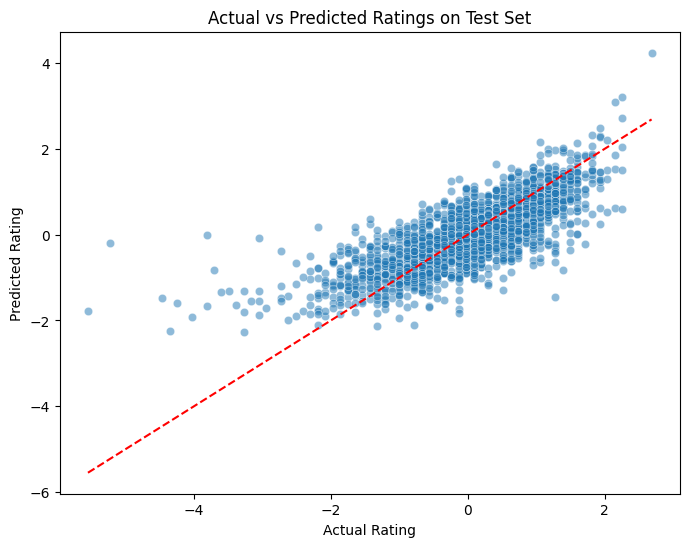

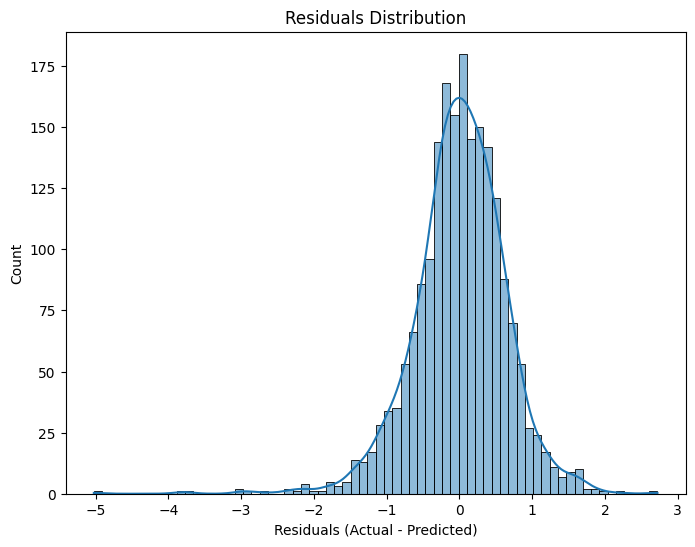

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns

# Предсказания на тесте
y_test_pred = model.predict(X_test)

# График: реальные vs предсказанные
plt.figure(figsize=(8,6))
sns.scatterplot(x=Y_test, y=y_test_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # диагональ y=x
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Ratings on Test Set')
plt.show()

# График остатков
residuals = Y_test - y_test_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals (Actual - Predicted)')
plt.title('Residuals Distribution')
plt.show()